<a href="https://colab.research.google.com/github/cszafariqbal/cszafar/blob/master/next_word_predict_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Text FIle

In [1]:
import pandas as pd
import numpy as np

In [2]:
file = open('pride_and_prejudice.txt', 'r', encoding= "utf8")

# Implement and Preprocessing the data

In [3]:
# store file in list
lines = []
for i in  file:
  lines.append(i)

print(lines)

['\ufeff\n', '    The Project Gutenberg eBook of Pride and Prejudice\n', '    \n', 'This ebook is for the use of anyone anywhere in the United States and \n', 'most other parts of the world at no cost and with almost no restrictions \n', 'whatsoever. You may copy it, give it away or re-use it under the terms \n', 'of the Project Gutenberg License included with this ebook or online \n', 'at www.gutenberg.org. If you are not located in the United States, \n', 'you will have to check the laws of the country where you are located \n', 'before using this eBook.\n', '\n', '\n', '\n', '    \n', '        Title: Pride and Prejudice\n', '        \n', '        Author: Jane Austen\n', '\n', '        \n', '        Release date: June 1, 1998 [eBook #1342]Most recently updated: April 14, 2023\n', '        Language: English\n', '        \n', '        Credits: Chuck Greif and the Online Distributed Proofreading Team at http://www.pgdp.net (This file was produced from images available at The Internet Ar

In [4]:
# convert list into string
data = ""
data = ' '.join(lines)
data

'\ufeff\n     The Project Gutenberg eBook of Pride and Prejudice\n     \n This ebook is for the use of anyone anywhere in the United States and \n most other parts of the world at no cost and with almost no restrictions \n whatsoever. You may copy it, give it away or re-use it under the terms \n of the Project Gutenberg License included with this ebook or online \n at www.gutenberg.org. If you are not located in the United States, \n you will have to check the laws of the country where you are located \n before using this eBook.\n \n \n \n     \n         Title: Pride and Prejudice\n         \n         Author: Jane Austen\n \n         \n         Release date: June 1, 1998 [eBook #1342]Most recently updated: April 14, 2023\n         Language: English\n         \n         Credits: Chuck Greif and the Online Distributed Proofreading Team at http://www.pgdp.net (This file was produced from images available at The Internet Archive)\n     \n         \n             *** START OF THE PROJECT GUT

In [5]:
# replace the stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“', '')
data

'     The Project Gutenberg eBook of Pride and Prejudice      This ebook is for the use of anyone anywhere in the United States and  most other parts of the world at no cost and with almost no restrictions  whatsoever. You may copy it, give it away or re-use it under the terms  of the Project Gutenberg License included with this ebook or online  at www.gutenberg.org. If you are not located in the United States,  you will have to check the laws of the country where you are located  before using this eBook.                 Title: Pride and Prejudice                  Author: Jane Austen                   Release date: June 1, 1998 [eBook #1342]Most recently updated: April 14, 2023         Language: English                  Credits: Chuck Greif and the Online Distributed Proofreading Team at http://www.pgdp.net (This file was produced from images available at The Internet Archive)                           *** START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***                    

In [6]:
# remove the unnacessary space
data = data.split()
data = ' '.join(data)
data[:300]

'The Project Gutenberg eBook of Pride and Prejudice This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License in'

In [7]:
len(data)

735587

# Tokenization of Text Data and Its Implement

In [8]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

In [9]:
# saving the tokenizer for predict function
import pickle
pickle.dump(tokenizer, open('token.pkl', 'wb'))

In [10]:
print(tokenizer.word_index)

{'the': 1, 'to': 2, 'of': 3, 'and': 4, 'her': 5, 'i': 6, 'a': 7, 'in': 8, 'was': 9, '”': 10, 'she': 11, 'that': 12, 'it': 13, 'not': 14, 'you': 15, 'he': 16, 'his': 17, 'be': 18, 'as': 19, 'had': 20, 'with': 21, 'for': 22, 'but': 23, 'is': 24, 'have': 25, 'at': 26, 'mr': 27, 'him': 28, 'on': 29, 'my': 30, 'by': 31, 'all': 32, 'they': 33, 'so': 34, 'elizabeth': 35, 'which': 36, 'were': 37, 'been': 38, 'could': 39, 'from': 40, 'no': 41, 'this': 42, 'very': 43, 'what': 44, 'would': 45, 'your': 46, 'me': 47, 'their': 48, 'them': 49, 'will': 50, 'said': 51, 'or': 52, 'such': 53, 'are': 54, 'when': 55, 'if': 56, 'darcy': 57, 'an': 58, 'there': 59, 'do': 60, 'mrs': 61, 'much': 62, 'more': 63, 'must': 64, 'am': 65, 'any': 66, 'miss': 67, 'bennet': 68, 'than': 69, 'who': 70, 'one': 71, 'did': 72, 'we': 73, 'jane': 74, 'bingley': 75, 'should': 76, 'has': 77, 'know': 78, 'how': 79, 'other': 80, 'though': 81, 'herself': 82, 'before': 83, 'well': 84, 'never': 85, 'can': 86, 'only': 87, 'think': 88,

In [11]:
sequance = tokenizer.texts_to_sequences([data])[0]
sequance[:15]


[1, 182, 443, 998, 3, 299, 4, 947, 42, 998, 24, 22, 1, 508, 3]

In [12]:
len(sequance)

132940

In [13]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

7323

In [14]:
sequance_list = []
for i in range(3, len(sequance)):
  words = sequance[i-3:i+1]
  sequance_list.append(words)

In [15]:
print("length of sequance_list:", len(sequance_list))

length of sequance_list: 132937


In [16]:
sequance_list = np.array(sequance_list)
sequance_list[:10]

array([[  1, 182, 443, 998],
       [182, 443, 998,   3],
       [443, 998,   3, 299],
       [998,   3, 299,   4],
       [  3, 299,   4, 947],
       [299,   4, 947,  42],
       [  4, 947,  42, 998],
       [947,  42, 998,  24],
       [ 42, 998,  24,  22],
       [998,  24,  22,   1]])

#split the data Features and Labels(targets)

In [17]:
x = []
y = []
for i in sequance_list:
  x.append(i[0:3])
  y.append(i[3])

x = np.array(x)
y = np.array(y)

print("data:", x[:10])
print("response:",y[:10])

data: [[  1 182 443]
 [182 443 998]
 [443 998   3]
 [998   3 299]
 [  3 299   4]
 [299   4 947]
 [  4 947  42]
 [947  42 998]
 [ 42 998  24]
 [998  24  22]]
response: [998   3 299   4 947  42 998  24  22   1]


In [18]:
from keras.utils import to_categorical

y = to_categorical(y)
y[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Create LSTM Model

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.optimizers import Adam

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             73230     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 7323)              7330323   
                                                                 
Total params: 20,452,553
Trainable params: 20,452,553
Non-trainable params: 0
_________________________________________________________________


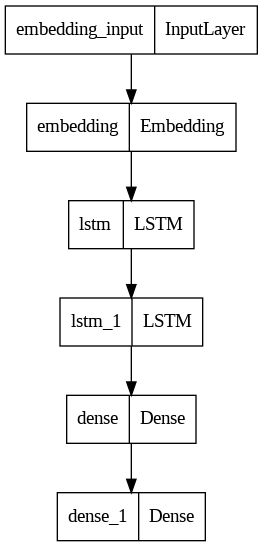

In [20]:
from keras.utils.vis_utils import plot_model
import keras
keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)


#Train The Model

In [21]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('next_point.h5', monitor='loss', verbose=1, save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001))
model.fit(x, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
2075/2078 [============================>.] - ETA: 0s - loss: 6.1945
Epoch 1: loss improved from inf to 6.19433, saving model to next_point.h5
2078/2078 [==============================] - 40s 15ms/step - loss: 6.1943
Epoch 2/70
2077/2078 [============================>.] - ETA: 0s - loss: 5.5592
Epoch 2: loss improved from 6.19433 to 5.55911, saving model to next_point.h5
2078/2078 [==============================] - 31s 15ms/step - loss: 5.5591
Epoch 3/70
2077/2078 [============================>.] - ETA: 0s - loss: 5.2526
Epoch 3: loss improved from 5.55911 to 5.25250, saving model to next_point.h5
2078/2078 [==============================] - 33s 16ms/step - loss: 5.2525
Epoch 4/70
2075/2078 [============================>.] - ETA: 0s - loss: 5.0348
Epoch 4: loss improved from 5.25250 to 5.03456, saving model to next_point.h5
2078/2078 [==============================] - 32s 15ms/step - loss: 5.0346
Epoch 5/70
2076/2078 [============================>.] - ETA: 0s - loss: 4.8414
E

#Load The Model and Tokinezier

In [22]:
#let load the model and tokenizer
from keras.models import load_model

model = load_model('next_point.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

#Predict The NEXT word by creating next_word_Prediction() Function

In [25]:
def next_word_prediction(model, tokenizer, text):
  sequances = tokenizer.texts_to_sequences([text])
  sequances = np.array(sequances)
  preds = np.argmax(model.predict(sequances))
  word_predicts = ""

  for key, value in tokenizer.word_index.items():
    if  value == preds:
      word_predict = key
      break

  print(word_predict)

while True:
  text = input("enter your line: ")

  if text == "0":
    print("Execution completed...")
    break

  else:
    try:
      words = text.split(" ")
      words = words[-3:]
      next_word_prediction(model, tokenizer, words)

    except Exception as e:
      print("error occure", e)
      continue






enter your line: why are you doing
1/1 [==============================] - 0s 19ms/step
are
enter your line: she allowed to here for
1/1 [==============================] - 0s 21ms/step
thither
enter your line: 0
Execution completed...
